<a href="https://colab.research.google.com/github/athirah-o/STQD6324_DataManagement_Assignment2/blob/main/P129566_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Airline On-Time Performance**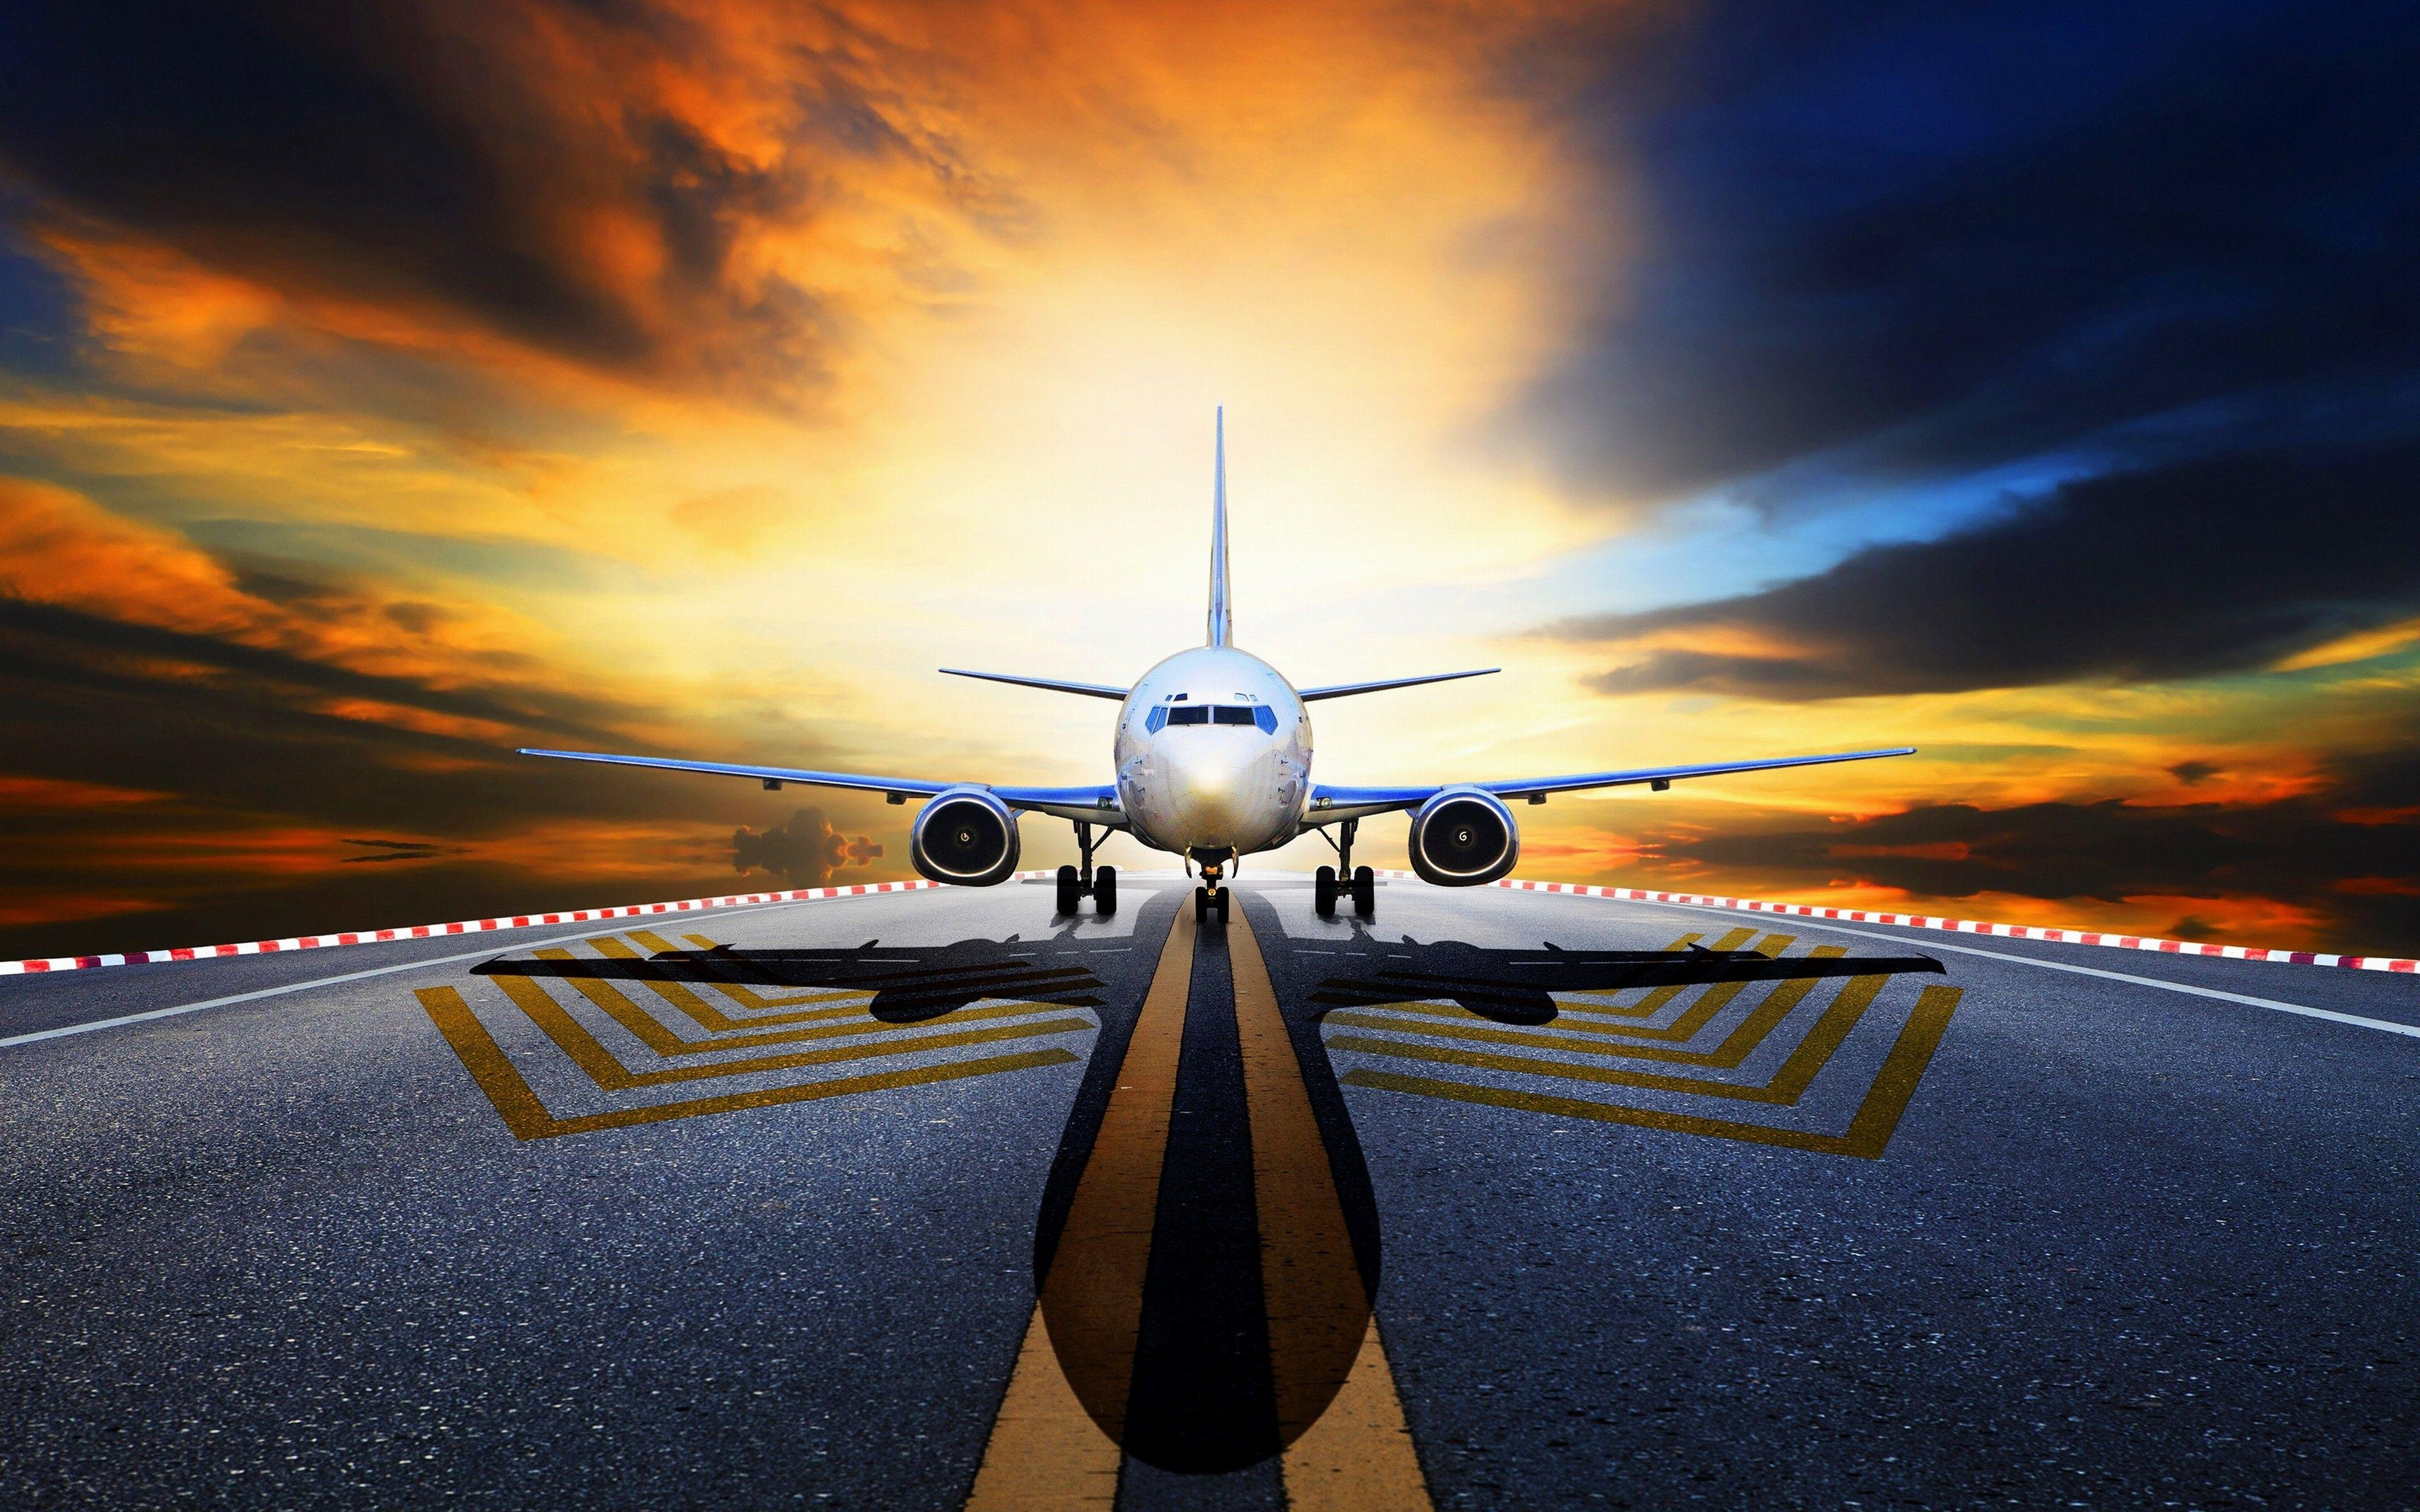

# **Introduction**

Airlines on-time performance (OTP) is a vital metric that gauges the punctuality and reliability of flights, reflecting an airline’s operational efficiency and its ability to meet customer expectations. The analysis of flight delays and cancellations is crucial as it not only impacts passenger satisfaction and loyalty but also affects the broader operational and financial health of airlines. Understanding the root causes of delays and cancellations enables airlines to implement targeted strategies to mitigate these issues, enhancing overall service quality and operational resilience. Moreover, comprehensive analysis helps in identifying patterns and trends, informing better decision-making and strategic planning. By prioritizing on-time performance and addressing disruptions proactively, airlines can significantly improve their reliability, reduce costs associated with delays, and foster a more positive travel experience for passengers.


In this project, we will utilize data from Kaggle's Data Expo 2009: Airline On Time Data, encompassing airline performance data from 1995 to 2007, to analyze trends and patterns in flight delays and cancellations. Specifically, we will focus on the dataset from 2004.csv, which contains 7,129,270 entries spread across 29 columns. Our primary objective is to explore the optimal time to minimize the flight delays and identify the key factors contributing to delays and cancellations. Given the substantial size of the dataset, we will leverage HIVE for efficient data processing and analysis, and use Python for visualizing the results.

# **Data Exploration**

In [27]:
import chardet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

In [28]:
file_path = (r"/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/2004.csv/2004.csv")

In [29]:
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))
    encoding = result['encoding']

In [30]:
df = pd.read_csv(file_path, encoding=encoding)

In [31]:
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2004,1,12,1,623.0,630,901.0,915,UA,462,...,7,11,0,NaN,0,0,0,0,0,0
1,2004,1,13,2,621.0,630,911.0,915,UA,462,...,16,16,0,NaN,0,0,0,0,0,0
2,2004,1,14,3,633.0,630,920.0,915,UA,462,...,4,15,0,NaN,0,0,0,0,0,0
3,2004,1,15,4,627.0,630,859.0,915,UA,462,...,4,10,0,NaN,0,0,0,0,0,0
4,2004,1,16,5,635.0,630,918.0,915,UA,462,...,3,13,0,NaN,0,0,0,0,0,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7129270 entries, 0 to 7129269
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     int64  
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             int64  
 20  TaxiOut            int64  
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       int64  
 25  WeatherDelay      

In [33]:
df.isnull().sum()

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               127757
CRSDepTime                 0
ArrTime               141541
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                  127
ActualElapsedTime     141541
CRSElapsedTime             0
AirTime               141541
ArrDelay              141541
DepDelay              127757
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
CancellationCode     7001506
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
dtype: int64

For this analysis, before extracting insights for further analysis, we created 2 temporary view tables(delayed and cancellation) with all the necessary entries and column for needed for the analysis. This is to ease the navigation of data since the dataset is in a huge volume

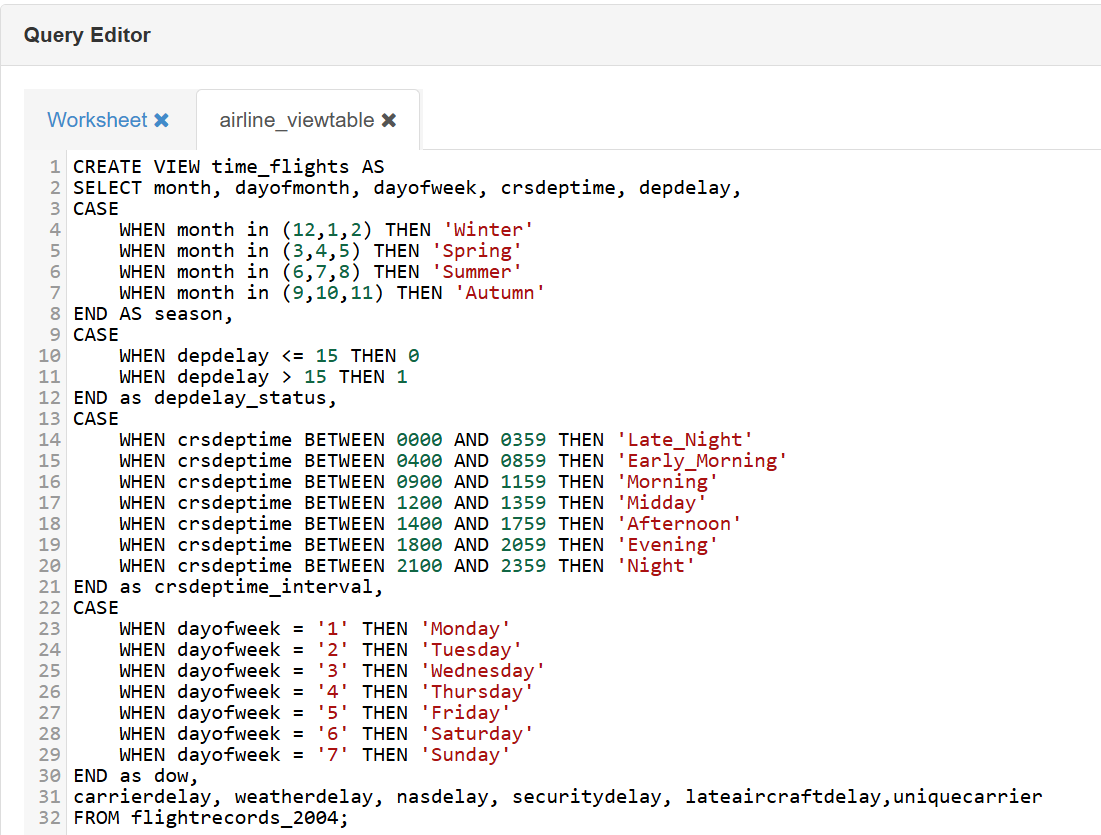

In [34]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/VIEW_Delayed.png', width =700)



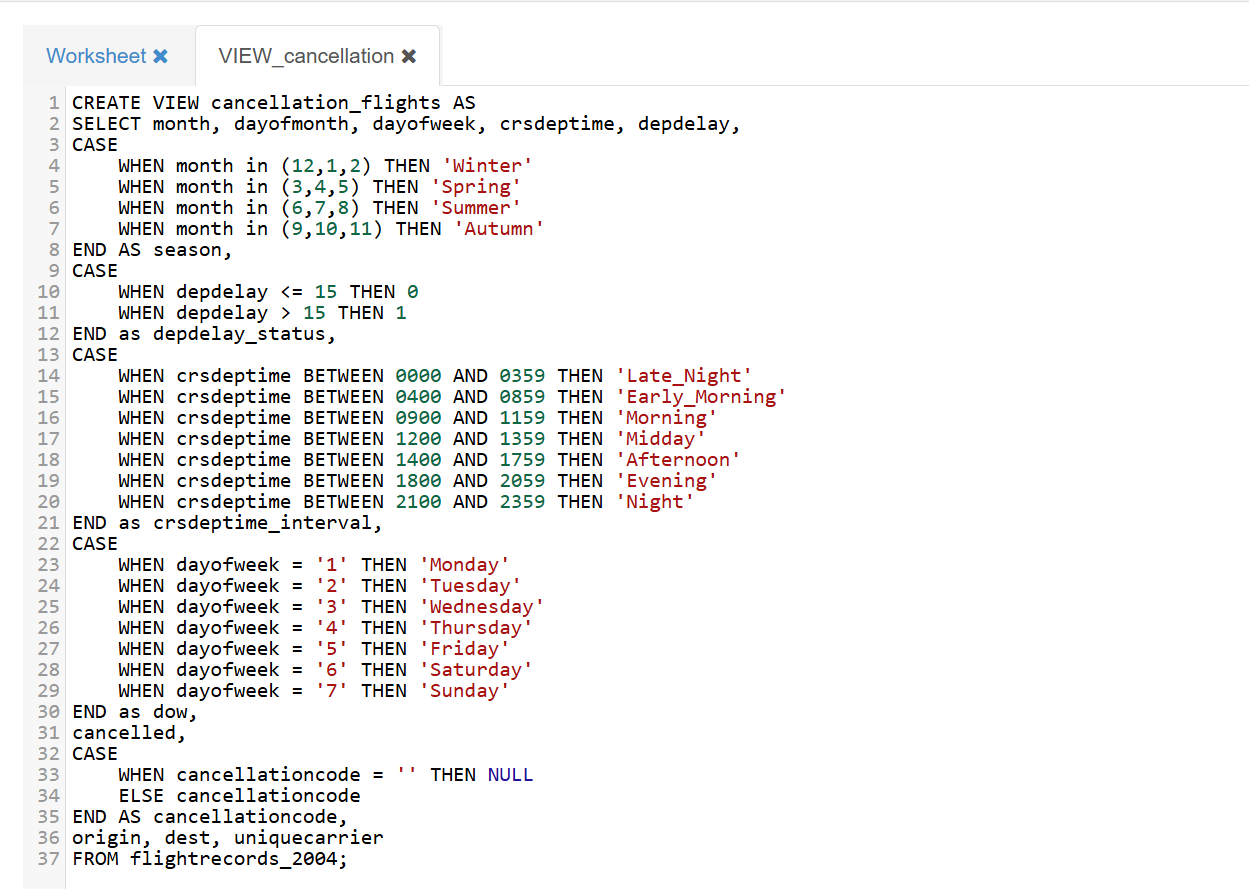

In [35]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/VIEW_Cancellation.png', width =700)

# **Challenge**

## **1. Optimal times of season, month,days of week and time-of-day for minimizing flight delays**

In [36]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

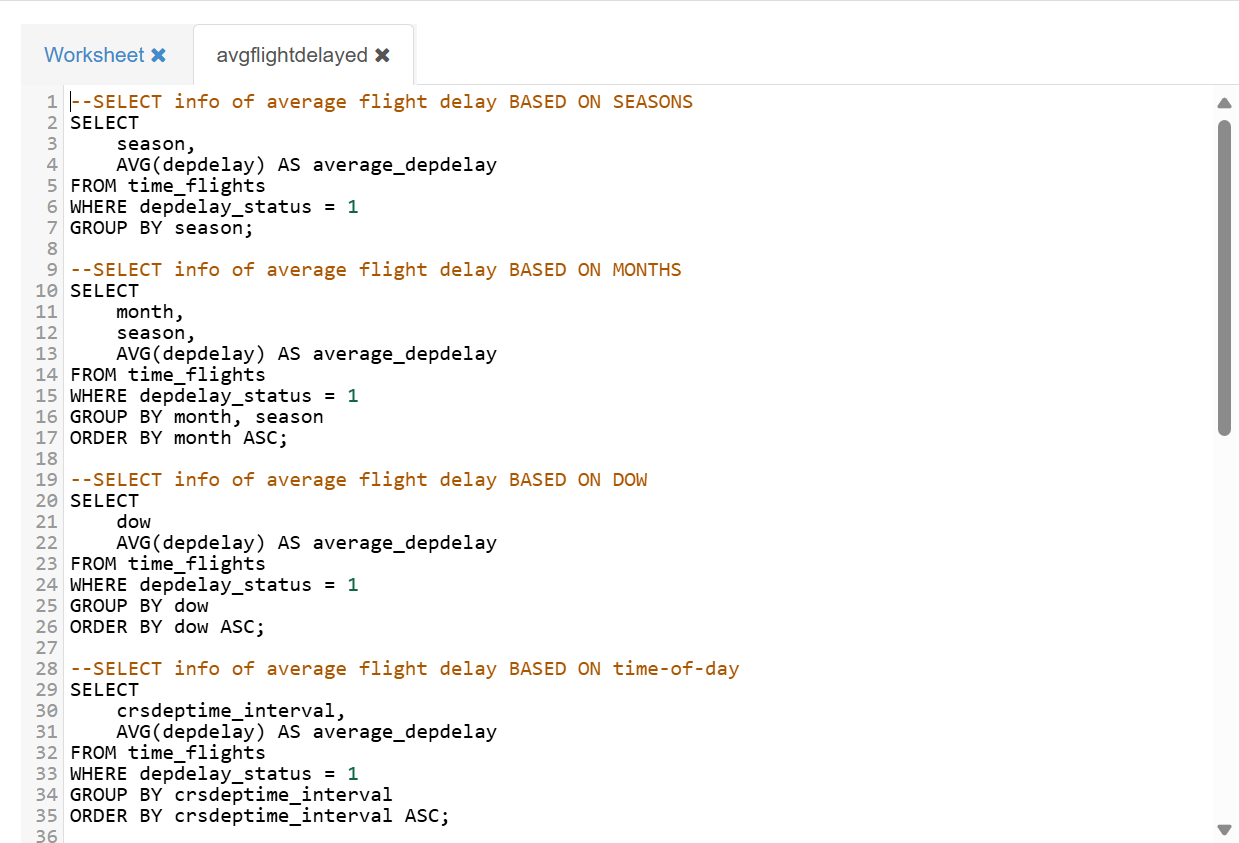

In [37]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/delayed_time.png', width =700)

In [38]:
avgdelay_seasons = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/avgdelay_season.csv")
avgdelay_month = pd.read_csv('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/avgdelay_month.csv')
avgdelay_dow = pd.read_csv('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/avgdelay_dow.csv')
avgdelay_tod = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/avgdelay_tod.csv")

display_side_by_side([avgdelay_seasons, avgdelay_month, avgdelay_dow, avgdelay_tod ],['Seasons','Months', 'DOW', 'TOD'])

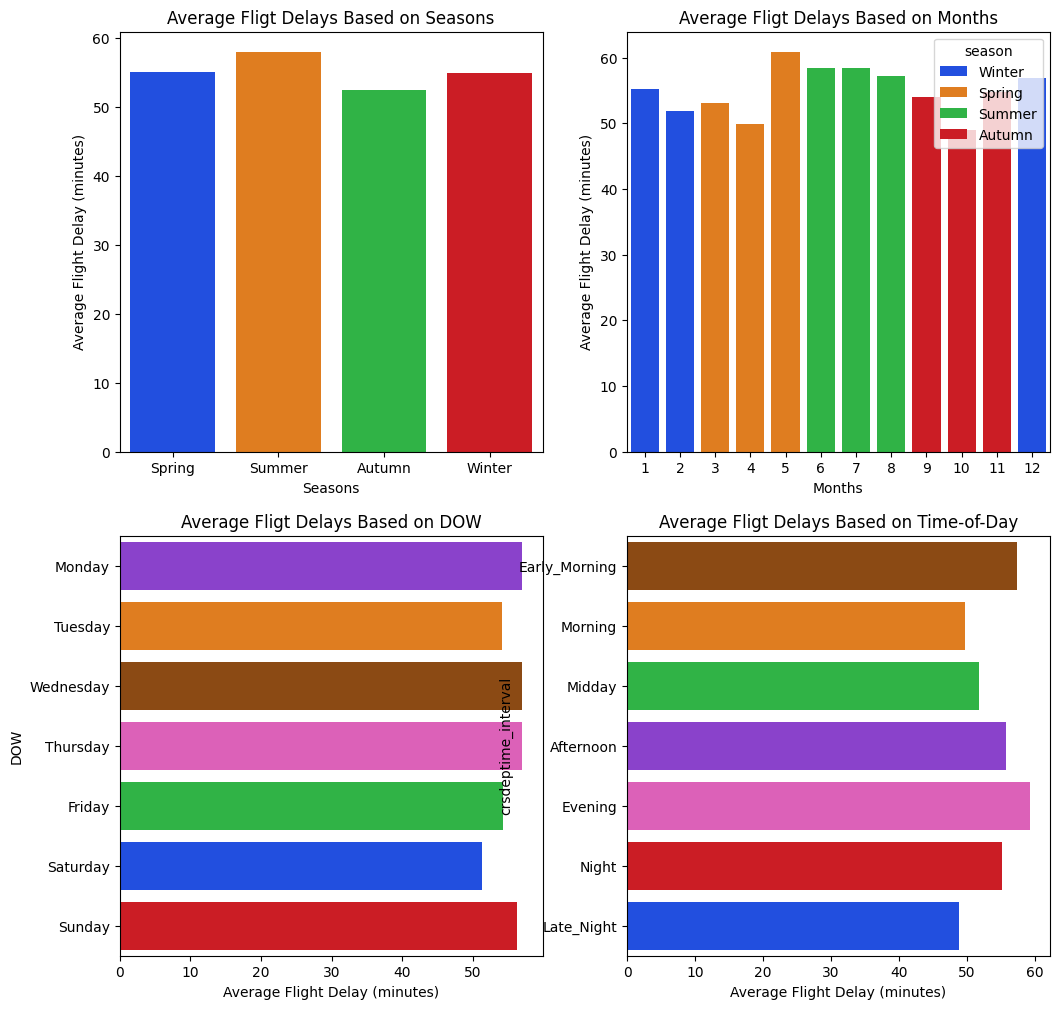

In [39]:
plt.figure(figsize=(12,12))

plt.subplot(2,2,1)
sns.barplot(y='average_depdelay', x='season', data=avgdelay_seasons, palette="bright",
            hue='season', legend=False)
plt.title('Average Fligt Delays Based on Seasons')
plt.xlabel('Seasons')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,2,2)
sns.barplot(data=avgdelay_month, x="month", y="average_depdelay", hue="season",
            palette="bright")
plt.title('Average Fligt Delays Based on Months')
plt.xlabel('Months')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,2,3)
sns.barplot(data=avgdelay_dow, x="average_depdelay", y="dow",
            order=["Monday", "Tuesday", "Wednesday", "Thursday","Friday", "Saturday", "Sunday"],
            palette = 'bright', hue='average_depdelay', legend=False)
plt.title('Average Fligt Delays Based on DOW')
plt.xlabel('Average Flight Delay (minutes)')
plt.ylabel('DOW')

plt.subplot(2,2,4)
sns.barplot(data=avgdelay_tod, y="crsdeptime_interval", x="average_depdelay",
            order=["Early_Morning", "Morning", "Midday", "Afternoon", "Evening", "Night", "Late_Night"],
            palette="bright", hue="average_depdelay", legend=False)
plt.title('Average Fligt Delays Based on Time-of-Day')
plt.xlabel('Average Flight Delay (minutes)')

plt.show();

Above four bar graphs that depict the average flight delays based on different categorical variables: seasons, months, days of the week (DOW), and time of day.              

*   **Seasonal Trends**: Summer experiences the highest average flight delays, followed by Winter. Spring and Autumn have relatively lower delays. The summer months tend to have higher average flight delays for a number of reasons, including an increase in passengers during holiday and vacation periods and the possibility of severe weather conditions like thunderstorms and hurricanes. Autumn is considered as 'shoulder season' which means less people travel during this period. However, unpredictable weather and storms (such as strong winds) can still cause delays during this shoulder season.
*   **Monthly Trends**: June, July, and August (Summer months) show the highest average delays, consistent with the seasonal analysis. Other months have slightly varying delays but remain below the summer peak.
*   **Day of the Week Trends(DOW)**: Monday, Wednesday, Thursday and Sunday have higher average flight delays, while Saturday and Tuesday have the lowest. Several potential reason why Monday have higher average departure delay because of high volume of business travelers starting their week and for Sunday due to leisure travelers returning from weekend trips, combined with residual operational issues from the weekend.
*   **Time of Day Trends**: Early morning flights have the highest delays, with significant delays also seen in the evening. Morning and late-night flights tend to have relatively lower delays. Several potential reasons for the high average departure delays in the early morning are residual delays from the previous day and the fact that airport operations are at their least efficient during the early morning hours, which can lead to flight delays. Late night has the least average departure delay due to late-night flights generally experience lower air and ground traffic, reducing the likelihood of congestion-related delays.


## **2. Primary factors contribute to flight delays**

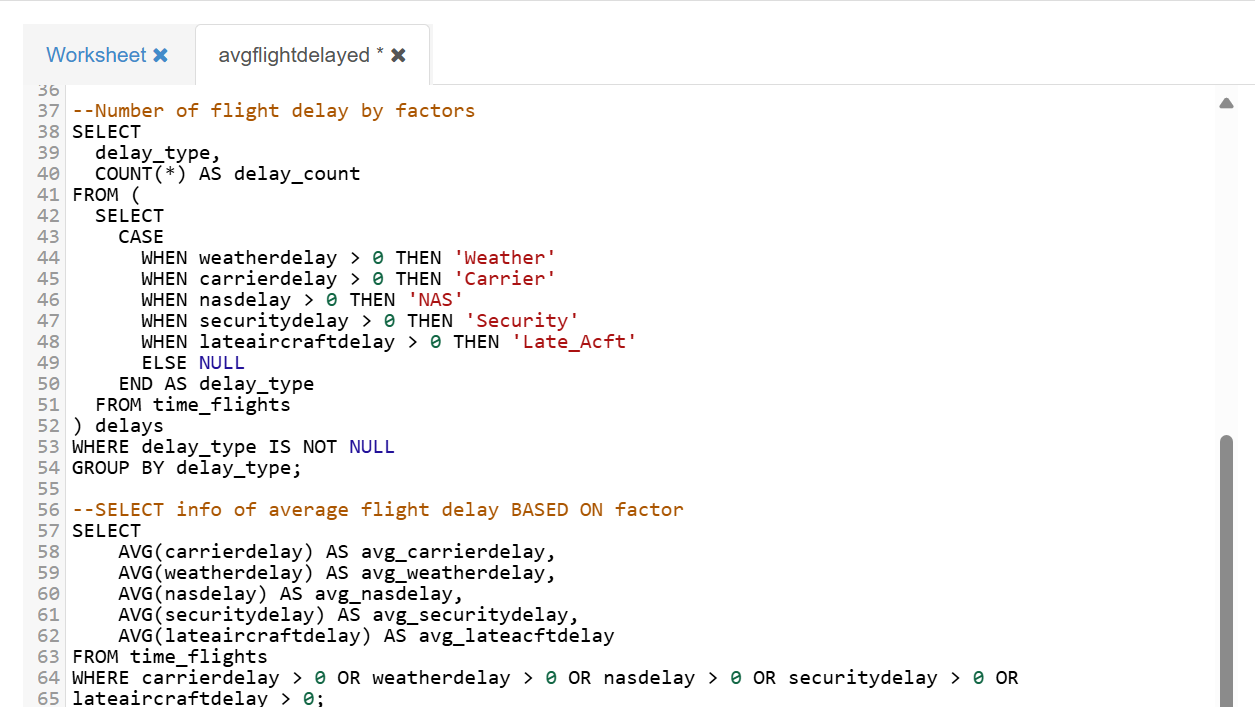

In [40]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/delay_caused.png', width =700)

In [41]:
total_fac = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/causeflightdelay_total.csv")

avgdelay_fac = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/avgdelay_fac.csv")
rename_dict = {
    'avg_weatherdelay': 'Weather',
    'avg_nasdelay': 'NAS',
    'avg_securitydelay': 'Security ',
    'avg_lateacftdelay': 'Late_Acft',
    'avg_carrierdelay': 'Carrier'}

avgdelay_fac = avgdelay_fac.rename(columns=rename_dict)
avgdelay_fac = avgdelay_fac.transpose().reset_index()
avgdelay_fac.columns = ['delay_type', 'Average_Delay(minutes)']

In [42]:
display_side_by_side([total_fac, avgdelay_fac],['FactorCountDelayed', 'FactorAvgDelayed'])


,delay_type,delay_count
0,Late_Acft,159308
1,NAS,575199
2,Carrier,567327
3,Weather,115989
4,Security,3568
,delay_type,Average_Delay(minutes)
0,Carrier,13.249748
1,Weather,3.544035
2,NAS,17.217187
3,Security,0.126087


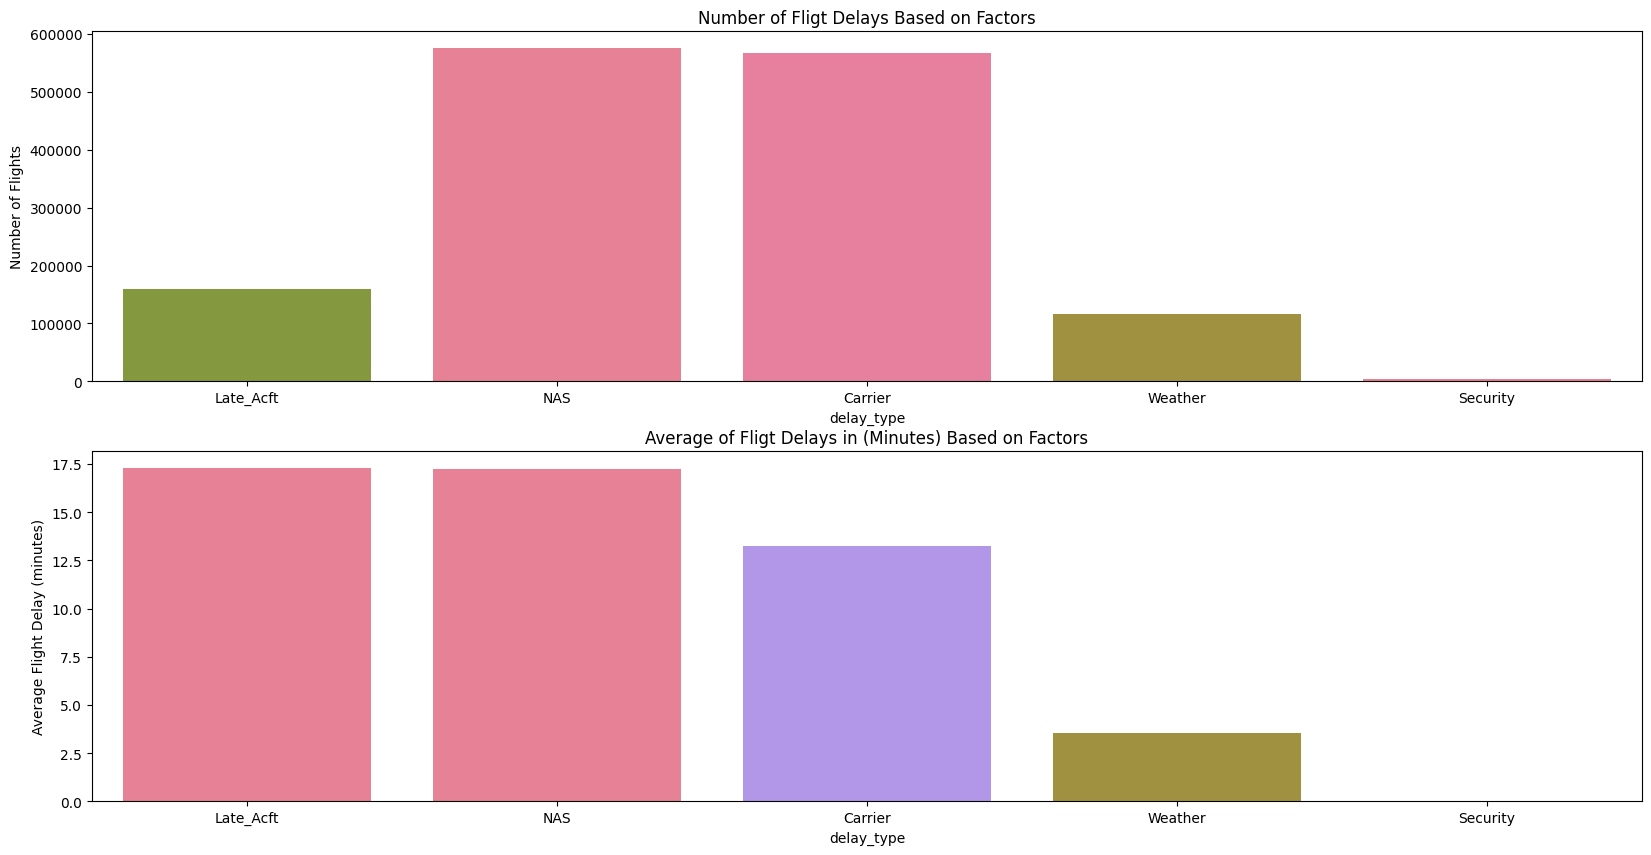

In [43]:
plt.figure(figsize=(20,10))

plt.subplot(2,1,1)
sns.barplot(data=total_fac, y="delay_count", x="delay_type",
            palette="husl", hue="delay_count", legend=False,
            order=["Late_Acft", "NAS", "Carrier", "Weather", "Security"])

plt.title('Number of Fligt Delays Based on Factors')
plt.ylabel('Number of Flights')

plt.subplot(2,1,2)
sns.barplot(data=avgdelay_fac, y="Average_Delay(minutes)", x="delay_type",
            palette="husl", hue="Average_Delay(minutes)", legend=False,
            order=["Late_Acft", "NAS", "Carrier", "Weather", "Security"])

plt.title('Average of Fligt Delays in (Minutes) Based on Factors')
plt.ylabel('Average Flight Delay (minutes)')

plt.show();





1.   **Major Delay Factors:**

      *   NAS and carrier issues are the leading causes of flight delays in terms of frequency, each causing about 500,000 delays.
      *   Despite being less frequent, late aircraft and weather delays still have a significant impact on overall flight delay statistics.


2.   **Severity of Delays**

  *   Late aircraft and NAS delays result in the longest average delays (around 17.5 minutes), highlighting their disruptive potential.
  *   Carrier-related delays are slightly shorter, but their high frequency still makes them a major concern.
  *   Weather-related delays, while less frequent, cause substantial disruptions (average delay of 10 minutes)
  *   Security-related delays are minimal in both frequency and duration, indicating effective security processes or lower incidence rates.









## **3.  Factors predominantly lead to flight cancellations**

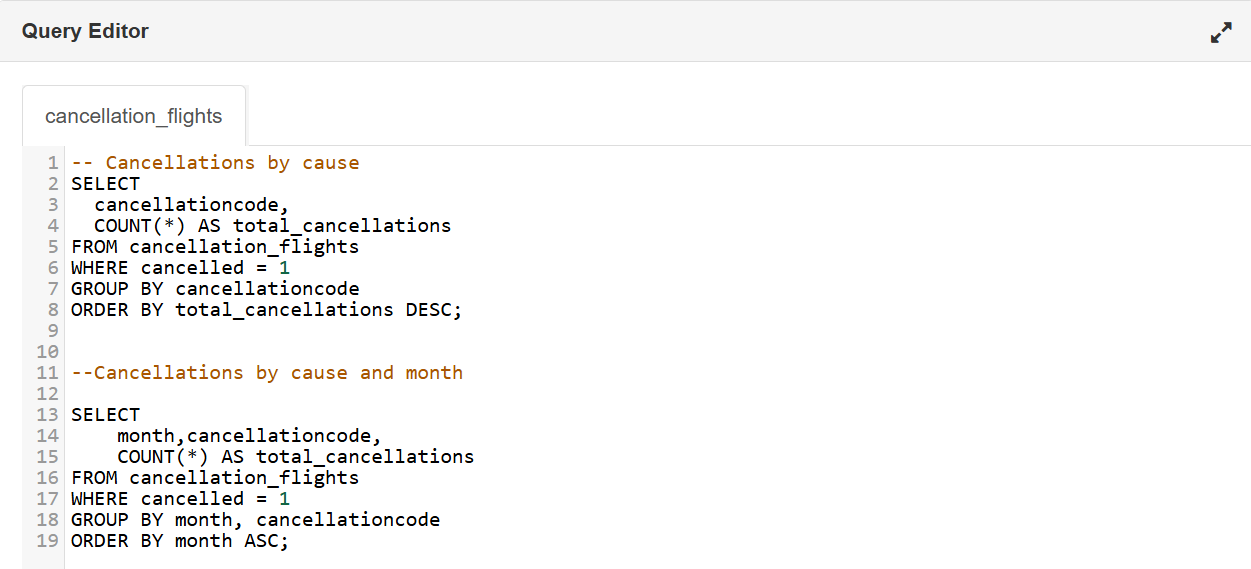

In [44]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/canx_caused.png', width =700)

In [45]:
canx_code = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/cancellation_code.csv")
canx_code['cancellationcode'] = canx_code['cancellationcode'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'})

canx_month = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/cancellation_month.csv")
canx_month['cancellationcode'] = canx_month['cancellationcode'].replace({'A': 'Carrier', 'B': 'Weather', 'C': 'NAS', 'D': 'Security'})
canx_month_10 = canx_month.head(10)

display_side_by_side([canx_code, canx_month_10],['TotalCancellation', 'CancellationByMonth'])

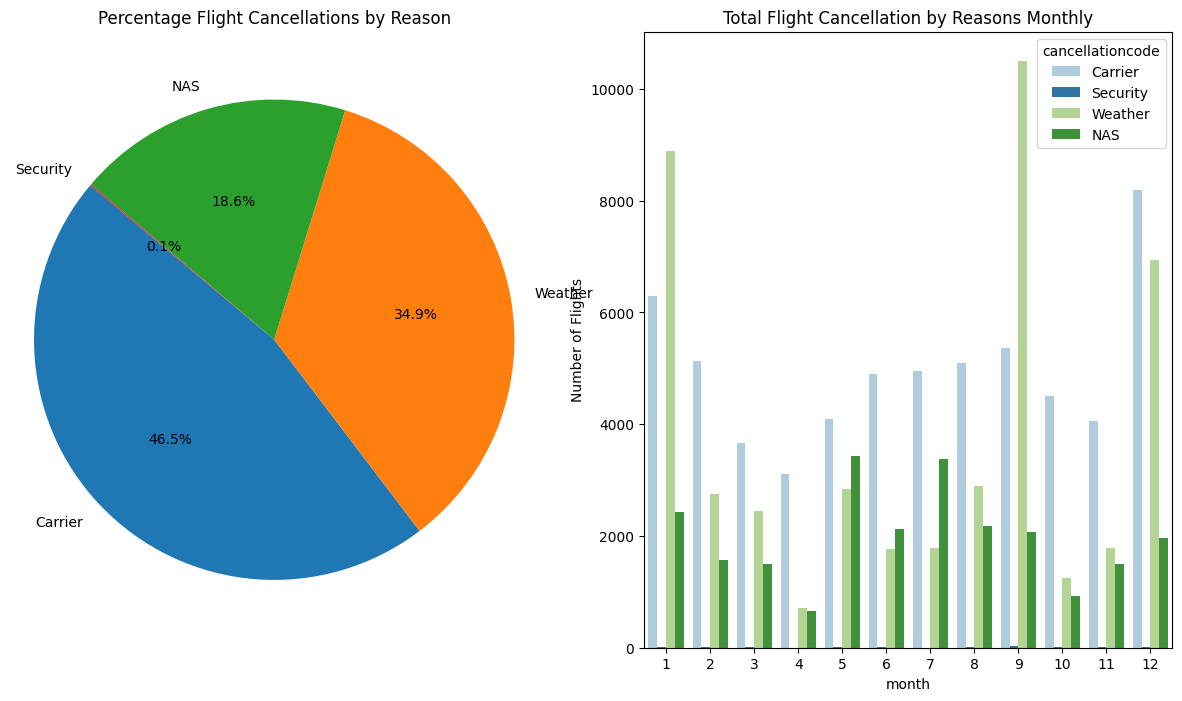

In [46]:
plt.figure(figsize=(15, 8))

plt.subplot(1,2,1)
plt.pie(canx_code['total_cancellations'], labels=canx_code['cancellationcode'], autopct='%1.1f%%', startangle=140)
plt.title('Percentage Flight Cancellations by Reason')
plt.axis('equal')

plt.subplot(1,2,2)
sns.barplot(data=canx_month, y="total_cancellations", x="month",
            palette="Paired", hue="cancellationcode")
plt.title('Total Flight Cancellation by Reasons Monthly')
plt.ylabel('Number of Flights')

plt.show()



1.   **Pie Chart: Percentage Flight Cancellations by Reason**
  *   Carrier (46.5%): The largest portion of flight cancellations is due to carrier-related issues, making up nearly half of all cancellations. Carrier-related issues, such as operational problems or scheduling conflicts, contribute significantly to flight cancellations.
  *   Weather (34.9%):  Weather-related cancellations account for slightly over a third of the total cancellations. Adverse weather conditions (e.g., storms, fog, snow) impact flight schedules.
  *   NAS (18.6%): CNational Air System (NAS) issues contribute to a significant portion of cancellations, though less than weather and carrier reasons. NAS issues include air traffic control delays, system outages, and congestion.
  *   Security (0.1%): Security-related cancellations are minimal, representing a very small fraction of the total cancellations.

2.   **Bar Chart: Total Flight Cancellations by Reasons Monthly**
  *   Carrier Cancellations: These are consistently high throughout the year with peaks in January and December, indicating potentially higher disruptions during winter months.
  *   Weather Cancellations: There are noticeable peaks in January and December as well as September, suggesting seasonal impacts on flight schedules.
  *   NAS Cancellations: These vary throughout the year but have significant peaks in January and July.
  *   Security Cancellations: These are negligible and almost invisible compared to other reasons, indicating minimal impact on overall flight cancellations.







## **4.0 Airlines flight delays and cancellations**

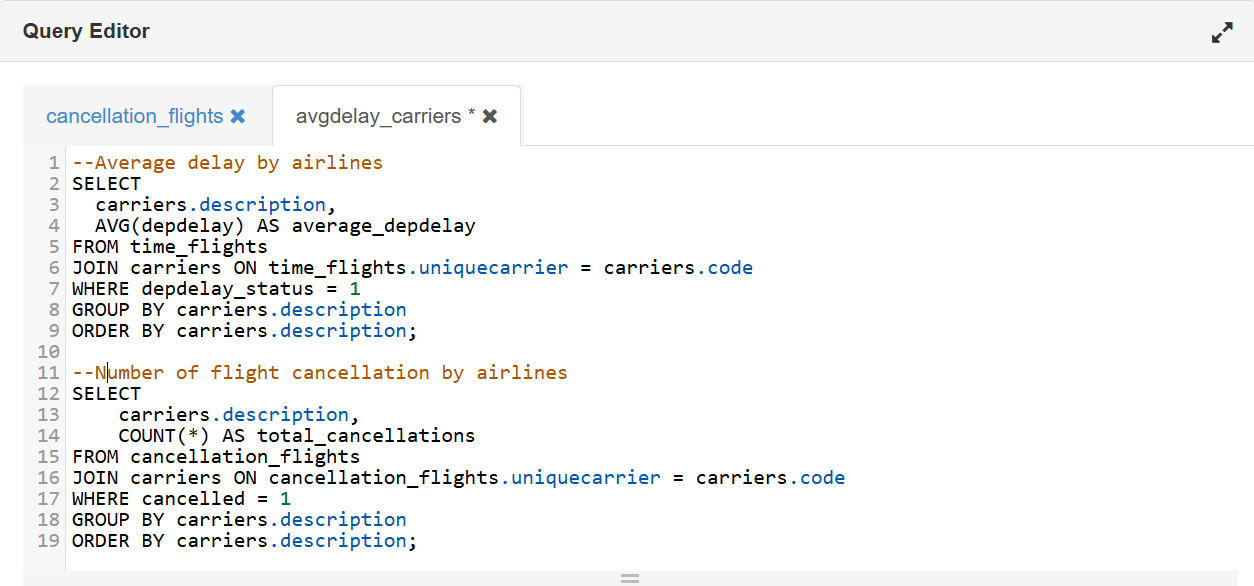

In [47]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/carriers.png', width =700)

In [48]:
carrier_avgdelay = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/carriers_avgdelay.csv")
carrier_avgdelay.columns = ['Airlines', 'average_depdelay']
top10_carrieravgdelay = carrier_avgdelay.head(10)

carrier_canx = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/carriers_cancellation.csv")
carrier_canx.columns = ['Airlines', 'total_cancellation']
top10_carriercancelled = carrier_canx.head(10)

display_side_by_side([top10_carrieravgdelay, top10_carriercancelled],['Airlines Average Delayed', 'Airlines Cancellation'])

,Airlines,average_depdelay
0,ATA Airlines d/b/a ATA,58.744280
1,AirTran Airways Corporation,58.425452
2,Alaska Airlines Inc.,53.425523
3,America West Airlines Inc. (Merged with US Airways 9/05. Stopped reporting 10/07.),50.725080
4,American Airlines Inc.,61.958589
5,American Eagle Airlines Inc.,55.690901
6,Atlantic Southeast Airlines,53.823679
7,Comair Inc.,54.844775
8,Continental Air Lines Inc.,62.951647
9,Delta Air Lines Inc.,53.199947


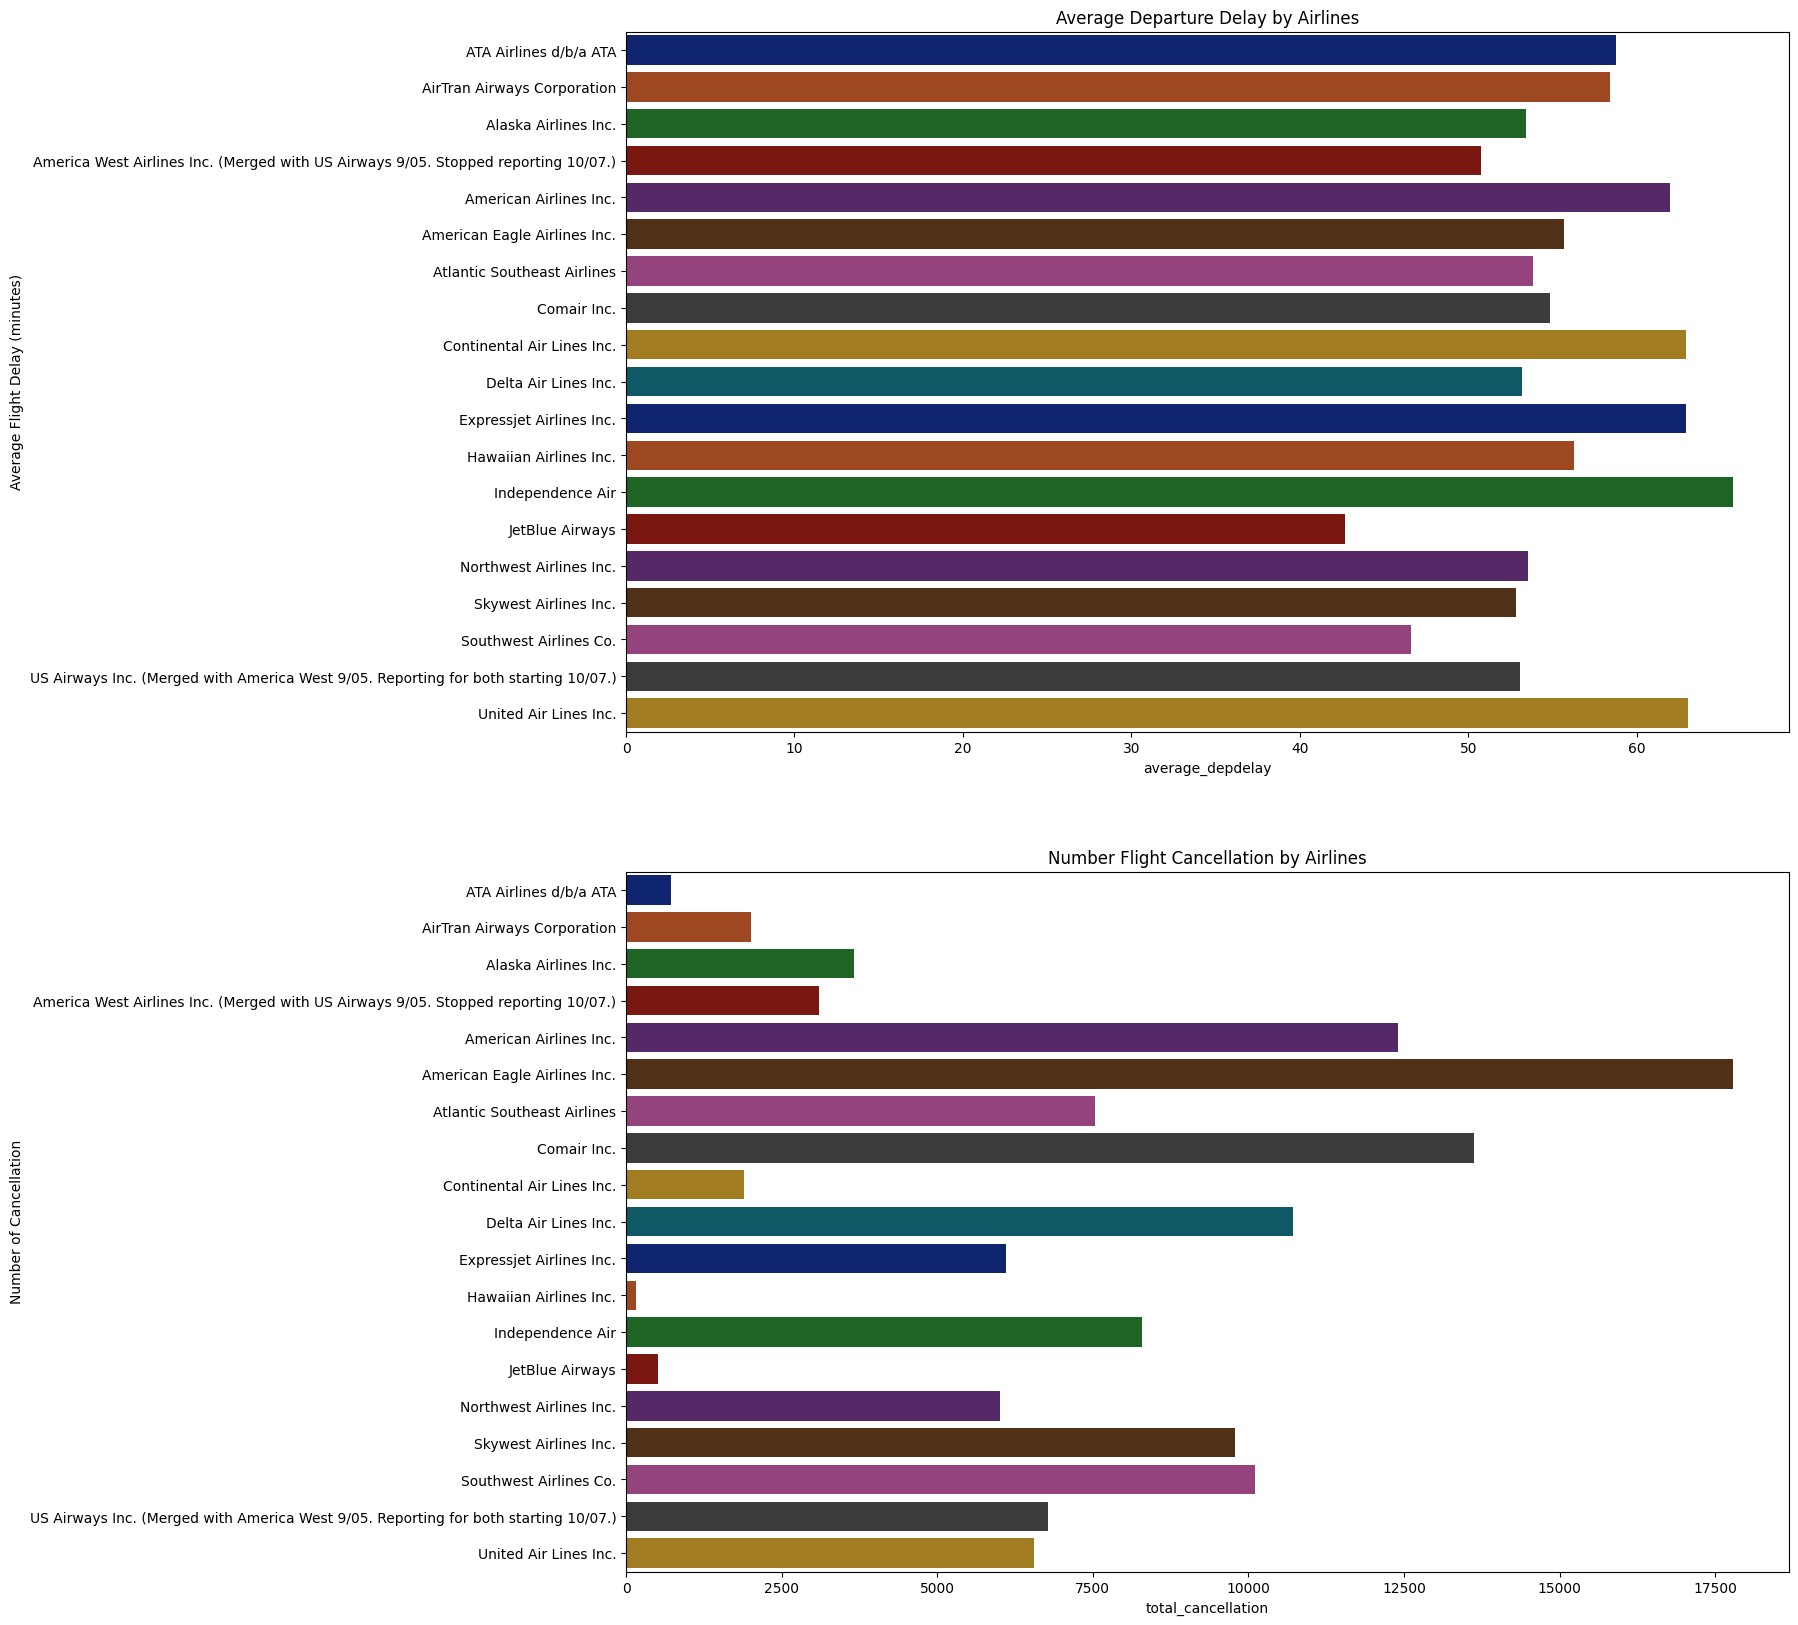

In [49]:
plt.figure(figsize=(15,20))

plt.subplot(2,1,1)
sns.barplot(data=carrier_avgdelay, y="Airlines", x="average_depdelay",
            palette="dark", hue="Airlines", legend=False)

plt.title('Average Departure Delay by Airlines')
plt.ylabel('Average Flight Delay (minutes)')

plt.subplot(2,1,2)
sns.barplot(data=carrier_canx, y="Airlines", x="total_cancellation",
            palette="dark", hue="Airlines", legend=False)

plt.title('Number Flight Cancellation by Airlines')
plt.ylabel('Number of Cancellation')
plt.show()


**1.   Average Departure Delay by Airlines**
  *   Independence Air has the longest average departure delay compared to all other airlines.
  *   United Air Lines Inc., Expressjet Airlines Inc., Continental Air Lines Inc.
 American Airlines also have significant average delays, exceeding 60 minutes.
  *   JetBlue Airways has a relatively lower average departure delay, just above 40 minutes.

**2.   Number of Flight Cancellations by Airlines**
  *   American Eagle Airlines Inc. has the highest number of cancellations, significantly more than other airlines, indicating it may face more frequent operational challenges.
  *   Hawaiian Airlines Inc and JetBlue Airways has relatively low number of flight cancellation.

**3.   Combined Insights**
  *   **High Delay and High Cancellations**: American Eagle Airlines Inc. and  American Airlines face both high average departure delays and a high number of cancellations, suggesting significant operational issues.
  *   **High Delay but Low Cancellations**: Hawaiian Airlines Inc. has high average delay but relatively low cancellations, which might indicate that while flights are often delayed, they are not frequently canceled.
  *   **Low Delay and Low Cancellations**: JetBlue Airways shows relatively low average delays and cancellations, indicating better overall performance in terms of punctuality and reliability.













## **5.0 Origin/Destination delays and cancellations**

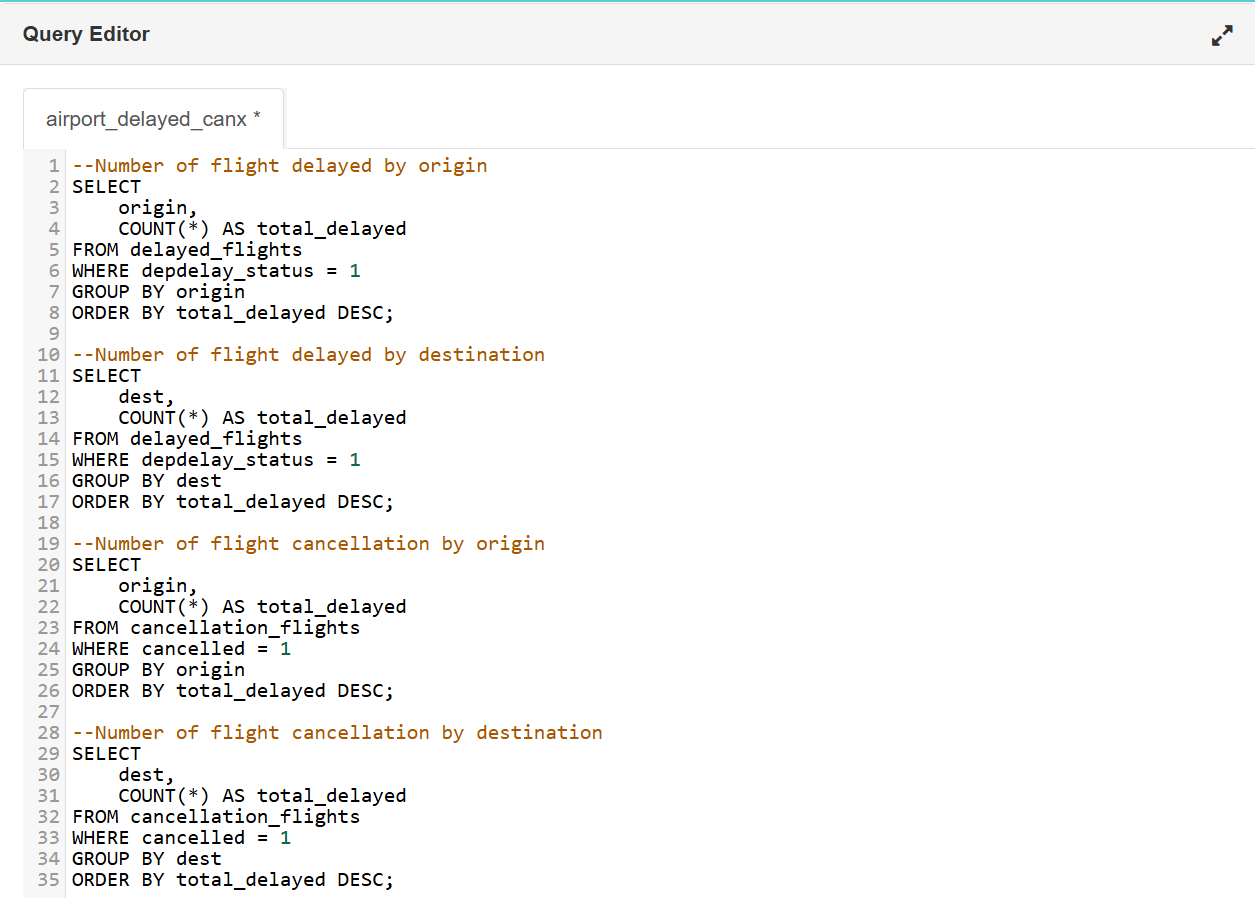

In [50]:
Image('/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Picture_HIVEQuery/airport.png', width =700)



In [51]:
origin_delayed = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/origin_delayed.csv")
top10_origindelayed = origin_delayed.head(10)

origin_canx = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/origin_cancelled.csv")
top10_origin_canx = origin_canx.head(10)

dest_delayed = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/dest_delayed.csv")
top10_dest_delayed = dest_delayed.head(10)

dest_canx = pd.read_csv("/content/drive/MyDrive/STQD6324_DataManagement/Assignment_2/Insight_Datasets/dest_cancelled.csv")
top10_dest_canx = dest_canx.head(10)

display_side_by_side([top10_origindelayed, top10_dest_delayed, top10_origin_canx, top10_dest_canx],
 ['Origin Flight Delayed', 'Destination Flight Delayed', "Destination Flight Delayed","Destination Flight Cancellation"])

,origin,total_delayed
0,ORD,87602
1,ATL,87474
2,DFW,57919
3,CVG,32921
4,PHX,30454
5,LAS,30264
6,LAX,29863
7,PHL,27318
8,EWR,26613
9,IAH,22857


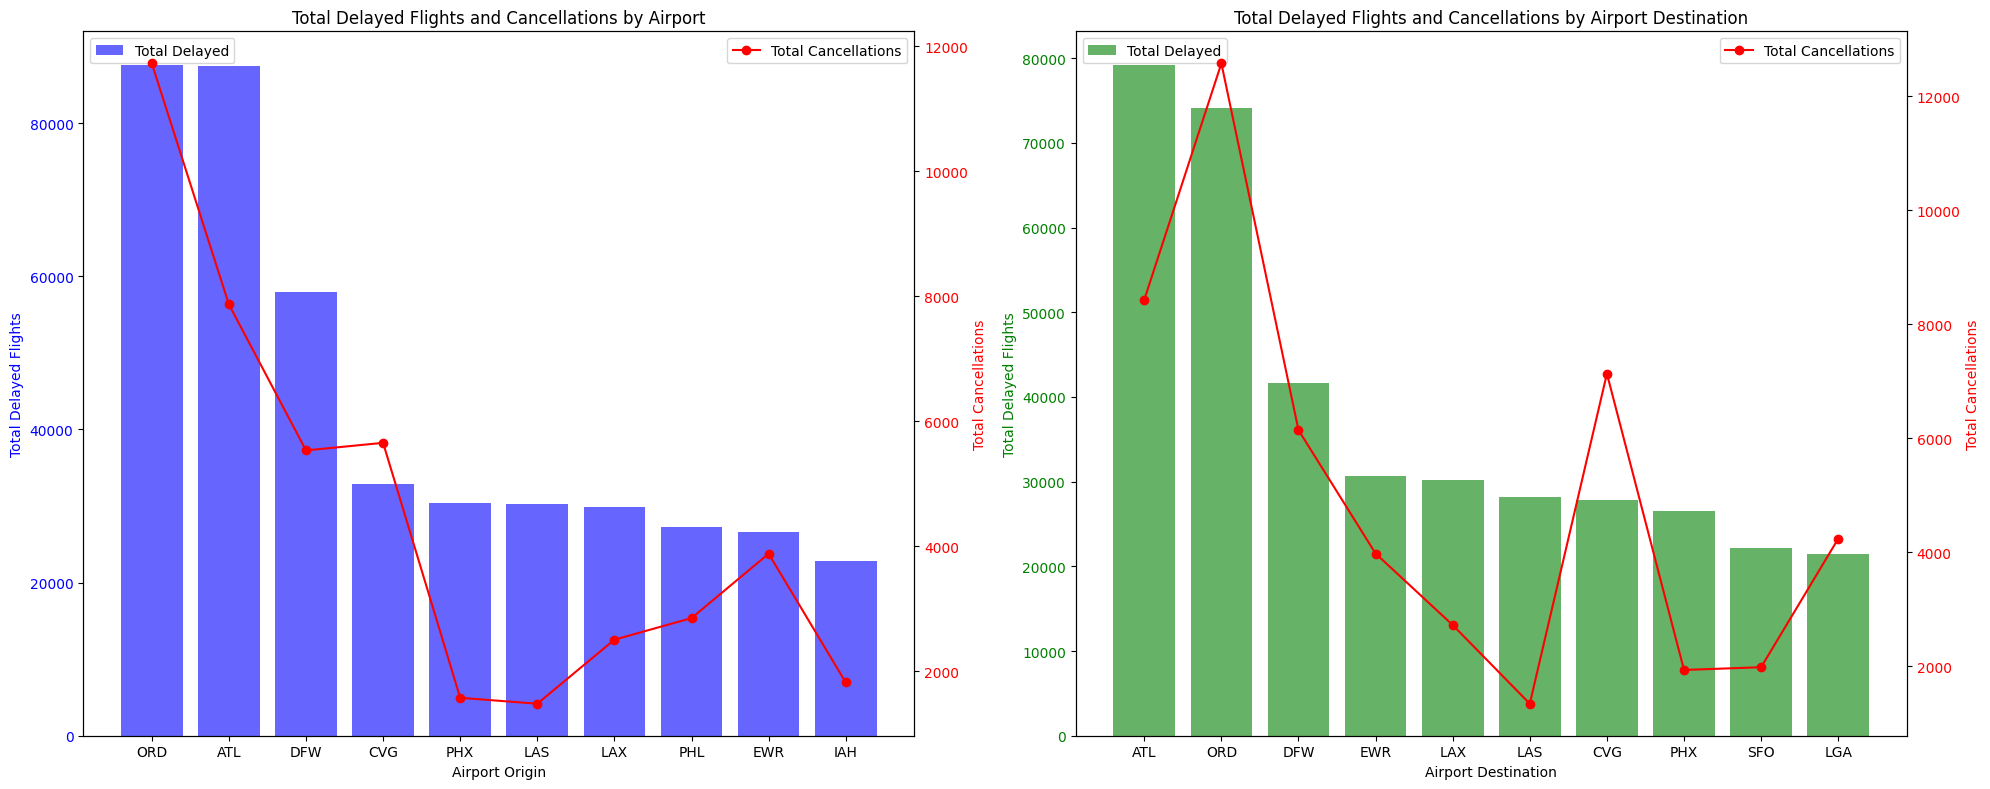

In [52]:
# Merging DataFrames on 'origin'
df_combined = pd.merge(origin_delayed, origin_canx, on='origin')
top10_origin = df_combined.head(10)

# Merging DataFrames on 'dest'
dest_combined = pd.merge(dest_delayed, dest_canx, on='dest')
top10_dest = dest_combined.head(10)

# Plotting
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(20, 8))

# Bar plot for origin total_delayed
ax1.bar(top10_origin['origin'], top10_origin['total_delayed'], color='b', alpha=0.6, label='Total Delayed')
ax1.set_xlabel('Airport Origin')
ax1.set_ylabel('Total Delayed Flights', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis
ax2 = ax1.twinx()

# Line plot for origin total_cancellations
ax2.plot(top10_origin['origin'], top10_origin['total_cancellations'], color='r', marker='o', label='Total Cancellations')
ax2.set_ylabel('Total Cancellations', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding title and legends
plt.title('Total Delayed Flights and Cancellations by Airport')
fig.tight_layout()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Bar plot for dest total_delayed
ax3.bar(top10_dest['dest'], top10_dest['total_delayed'], color='g', alpha=0.6, label='Total Delayed')
ax3.set_xlabel('Airport Destination')
ax3.set_ylabel('Total Delayed Flights', color='g')
ax3.tick_params(axis='y', labelcolor='g')

# Create a second y-axis
ax4 = ax3.twinx()

# Line plot for dest total_cancellations
ax4.plot(top10_dest['dest'], top10_dest['total_cancellation'], color='r', marker='o', label='Total Cancellations')
ax4.set_ylabel('Total Cancellations', color='r')
ax4.tick_params(axis='y', labelcolor='r')

# Adding title and legends
plt.title('Total Delayed Flights and Cancellations by Airport Destination')
fig.tight_layout()
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')

plt.show();

**Insigths from Both Graphs:**
  *   Both graphs indicate that major airports like ORD, ATL, and DFW experience high volumes of delays and cancellations, whether considering flights departing from or arriving at these airports.
  *   PHX,LAS and SFO has low flight cancellation despite high number of flight delayed which might indicate that while flights are often delayed, they are not frequently canceled.
  *   There is a notable peak in cancellations at CVG when considering destination data, which is unusual compared to its delay figures.




# **Conclusion**

Airlines on-time performance is a critical measure of the efficiency and reliability of air travel. It refers to the punctuality of flights, indicating how often they depart and arrive as scheduled. This performance metric is vital for both airlines and passengers, as it affects customer satisfaction, operational efficiency, and overall reputation. Consistently high on-time performance minimizes delays, reduces operational costs, and enhances the travel experience, while poor performance can lead to missed connections, increased costs, and passenger dissatisfaction. By closely monitoring and improving on-time performance, airlines strive to ensure a smooth and dependable service.